In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from operator import itemgetter

In [2]:
annotated_test_dataset = pd.read_csv("data/annotated_test_dataset.csv")

print(annotated_test_dataset.shape)
print(annotated_test_dataset.head())

(2094, 9)
   index  par_id                                               text  label  \
0    422    8627  More than 100,000 people have signed an online...    0.0   
1   1305    9591  The organizers of the event , which attracted ...    0.0   
2   1983   10344  Sadio Mane 's injury may be the break Alex Oxl...    0.0   
3   1722   10061  Dr Thomas Kway , coordinator of HIV care and t...    0.0   
4   1699   10038  There are also a growing number of the homeles...    0.0   

         keyword country  intensity  length  prediction  
0       disabled      hk          0   406.0         0.0  
1        migrant      ie          0   320.0         0.0  
2        in-need      gh          0    84.0         0.0  
3  poor-families      tz          0   213.0         0.0  
4       homeless      my          0   172.0         0.0  


### Analysis of F1 score with different intensities

In [3]:
def get_intensity_histograms(df, intensity, axis):
    intensity_df = df.loc[df.intensity.map(int) == intensity]
    series = intensity_df.prediction.map(int)
    _, _, [patch0, patch1] = axis.hist(series, bins=[-0.5, 0.5, 1.5])

    patch0.set_facecolor("tab:blue")
    patch1.set_facecolor("tab:orange")

    axis.set_xticks([0, 1], labels=["Unpatronising", "Patronising"])

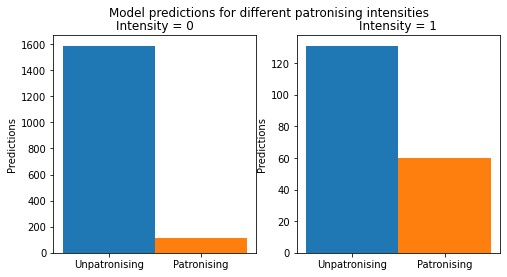

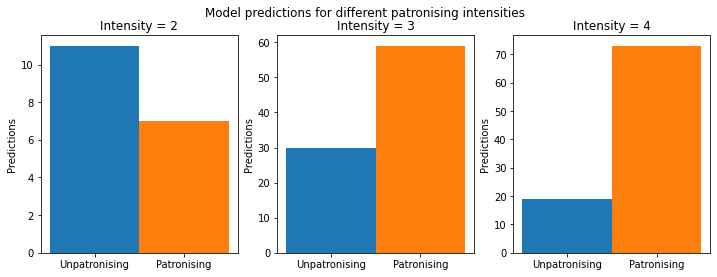

In [4]:
figure_unpatr, (axis0, axis1) = plt.subplots(1, 2)

figure_unpatr.set_size_inches((8, 4))
figure_unpatr.suptitle("Model predictions for different patronising intensities")

axis0.set_ylabel("Predictions")
axis1.set_ylabel("Predictions")

axis0.set_title("Intensity = 0")
axis1.set_title("Intensity = 1")

series = get_intensity_histograms(annotated_test_dataset, 0, axis0)
series = get_intensity_histograms(annotated_test_dataset, 1, axis1)

figure_patr, (axis2, axis3, axis4) = plt.subplots(1, 3)

figure_patr.set_size_inches(12, 4)
figure_patr.suptitle("Model predictions for different patronising intensities")

axis2.set_ylabel("Predictions")
axis3.set_ylabel("Predictions")
axis4.set_ylabel("Predictions")

axis2.set_title("Intensity = 2")
axis3.set_title("Intensity = 3")
axis4.set_title("Intensity = 4")

get_intensity_histograms(annotated_test_dataset, 2, axis2)
get_intensity_histograms(annotated_test_dataset, 3, axis3)
get_intensity_histograms(annotated_test_dataset, 4, axis4)

In [5]:
def intensity_f1_score(df):
    f1_scores = list()

    for intensity in range(5):
        intensity_df = df.loc[df.intensity.map(int) == intensity]
        labels = intensity_df.label.tolist()
        predictions = intensity_df.prediction.tolist()
        
        score = f1_score(labels, predictions)
        f1_scores.append(score)
    
    return f1_scores

In [6]:
intensity_f1_score(annotated_test_dataset)

[0.0, 0.0, 0.56, 0.7972972972972973, 0.8848484848484849]

### Analysis of F1 score with different input lengths

In [7]:
def input_length_f1_score(df):
    results = list()
    
    for lb in np.arange(0, 200, 20):
        ub = lb + 20
        length_df = df.loc[df.length >= lb]
        length_df = length_df.loc[length_df.length < ub]

        predictions = length_df.prediction.map(int)
        labels = length_df.label.map(int)

        score = f1_score(labels, predictions)
        results.append((score, f"{lb} <= n < {ub}"))
    
    scores, labels = zip(*results)

    return list(scores), list(labels)

[0.0, 0.0, 0.6666666666666666, 0.6, 0.42857142857142855, 0.6666666666666666, 0.7499999999999999, 0.38095238095238093, 0.6153846153846154, 0.46808510638297873]


/Users/louismanestar/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/louismanestar/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Text(0, 0.5, 'F1 Score')

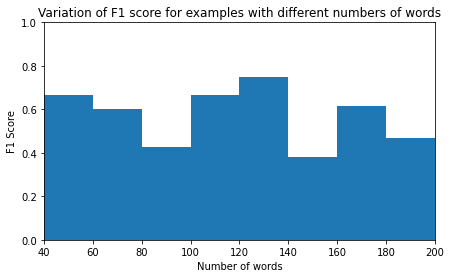

In [18]:
scores, labels = input_length_f1_score(annotated_test_dataset)

figure, axis = plt.subplots()
figure.set_size_inches((7, 4))

print(scores)

axis.bar(np.arange(10, 210, 20), scores, width=20)

axis.set_xlim(40, 200)
axis.set_ylim(0, 1)

axis.set_title("Variation of F1 score for examples with different numbers of words")
axis.set_xlabel("Number of words")
axis.set_ylabel("F1 Score")

### Analysis of F1 score with different categories

In [9]:
def categories_f1_score(df):
    results = list()
    
    for category in np.unique(df.keyword):
        category_df = df.loc[df.keyword == category]
        predictions = category_df.prediction
        labels = category_df.label

        score = f1_score(labels, predictions)
        results.append((score, category))
    
    results.sort(key=itemgetter(0), reverse=True)
    scores, labels = zip(*results)

    return list(scores), list(labels)

Text(0, 0.5, 'F1 Score')

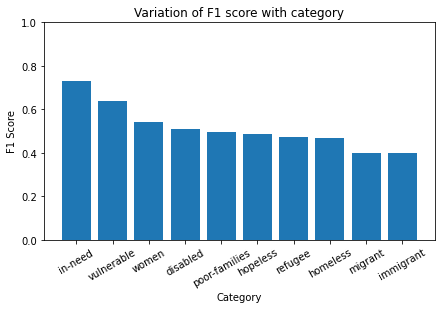

In [17]:
figure, axis = plt.subplots()
figure.set_size_inches((7, 4))

scores, labels = categories_f1_score(annotated_test_dataset)
axis.bar(np.arange(len(labels)), scores, tick_label=labels)

axis.set_ylim(0, 1)
axis.tick_params(axis='x', labelrotation=30)

axis.set_title("Variation of F1 score with category")
axis.set_xlabel("Category")
axis.set_ylabel("F1 Score")

### Analysis of F1 score with different countries

In [11]:
def country_f1_score(df):
    results = list()
    
    for country in np.unique(df.country):
        country_df = df.loc[df.country == country]
        predictions = country_df.prediction
        labels = country_df.label

        score = f1_score(labels, predictions)
        results.append((score, country))
    
    results.sort(key=itemgetter(0), reverse=True)
    scores, labels = zip(*results)

    return list(scores), list(labels)

Text(0, 0.5, 'F1 Score')

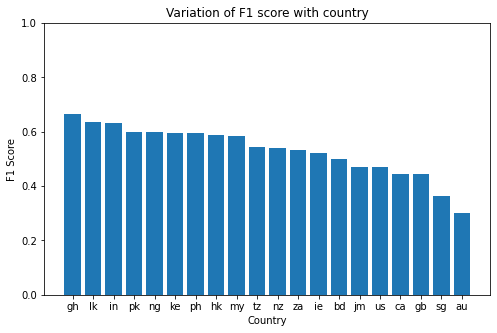

In [13]:
figure, axis = plt.subplots()
figure.set_size_inches((7, 4))

scores, labels = country_f1_score(annotated_test_dataset)
axis.bar(np.arange(len(labels)), scores, tick_label=labels)

axis.set_ylim(0, 1)

axis.set_title("Variation of F1 score with country")
axis.set_xlabel("Country")
axis.set_ylabel("F1 Score")